# Introduction to data wrangling and Machine Learning

#### First of all, lets get our hands dirty and try some pandas examples.

The first part of this note book is taken from this [cheat_sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [1]:
import pandas as pd

Creating a dataframe

In [2]:
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


Specify values for each column.


In [3]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


### Method Chaning

Most pandas methods return a DataFrame so that
another pandas method can be applied to the
result. This improves readability of code.


In [5]:
# rename the columns as follows and query 'BB' columns after ward to select
# with 'BB' >= 8.
df.rename(columns={
    'a': 'AA',
    'b': 'BB',
    'c': 'CC'
}).query('BB>=8')

,AA,BB,CC
2,5,8,11
3,6,9,12


It can be also queried this way

In [ ]:
df.rename(columns={
  'a' : 'AA',
  'b' : 'BB',
  'c' : 'CC'}).loc[df.b >= 8]

,AA,BB,CC
2,5,8,11
3,6,9,12


Reshaping Data – Change the layout of a data set

In [6]:
df = pd.melt(df)
#Gather columns into rows
df

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [9]:
df2 = df.pivot(columns='variable', values='value')
#Spread rows into columns.
df2

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


In [21]:
df3 = pd.concat([df,df])
df3

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12
0,a,4


In [ ]:
# concatenate them vertically
pd.concat([df,df], axis=1)

,variable,value,variable,value
0,a,4,a,4
1,a,5,a,5
2,a,6,a,6
3,b,7,b,7
4,b,8,b,8
5,b,9,b,9
6,c,10,c,10
7,c,11,c,11
8,c,12,c,12


In [10]:
# Ascendingly sort df based 'variable' column
df.sort_values('variable', ascending=False)

,variable,value
6,c,10
7,c,11
8,c,12
3,b,7
4,b,8
5,b,9
0,a,4
1,a,5
2,a,6


In [11]:
df.sort_index()

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [13]:
# set 'variabl' column as an index
df = df.set_index('variable')
df

,value
variable,
a,4
a,5
a,6
b,7
b,8
b,9
c,10
c,11
c,12


In [14]:
df = df.reset_index()
# reset the index you just set :)
df

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [17]:
# drop the 'value' column
df.drop(columns=['value'])

,variable
0,a
1,a
2,a
3,b
4,b
5,b
6,c
7,c
8,c


In [18]:
df

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


We deleted the column named `'value'`, why does it still exist?

## Subset Observations (Rows)

In [19]:
df[df.value > 7]
# Extract rows that meet logical criteria. df.value > 7

,variable,value
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [22]:
df3

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12
0,a,4


In [23]:
# drop df3 duplications
df3.drop_duplicates()

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [24]:
df.head(5)

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8


In [25]:
df.tail(3)

,variable,value
6,c,10
7,c,11
8,c,12


In [26]:
# Randomly select fractions of rows
df.sample(frac=0.3)

,variable,value
7,c,11
6,c,10
5,b,9


In [27]:
# Randomly select n rows
df.sample(n=4)

,variable,value
3,b,7
7,c,11
1,a,5
0,a,4


In [28]:
df.iloc[7:9]
#Select rows by position.

,variable,value
7,c,11
8,c,12


In [29]:
df.nlargest(5, 'value')
#Select and order top n entries.

,variable,value
8,c,12
7,c,11
6,c,10
5,b,9
4,b,8


In [ ]:
df.nsmallest(3, 'value')
#Select and order bottom n entries.

,variable,value
0,a,4
1,a,5
2,a,6


## Subset Variables (Columns)

In [30]:
df4 = pd.concat([df, df.rename(columns={'variable': 'var', 'value': 'val'})], axis=1)
df4[['value','val','var']]
# Select multiple columns with specific names

,value,val,var
0,4,4,a
1,5,5,a
2,6,6,a
3,7,7,b
4,8,8,b
5,9,9,b
6,10,10,c
7,11,11,c
8,12,12,c


In [31]:
df4.loc[:,'variable':'var']
#Select all columns between x2 and x4 (inclusive).

,variable,value,var
0,a,4,a
1,a,5,a
2,a,6,a
3,b,7,b
4,b,8,b
5,b,9,b
6,c,10,c
7,c,11,c
8,c,12,c


In [32]:
df4.iloc[:,[0,1,3]]
#Select columns in positions 1, 2 and 5 (first column is 0).

,variable,value,val
0,a,4,4
1,a,5,5
2,a,6,6
3,b,7,7
4,b,8,8
5,b,9,9
6,c,10,10
7,c,11,11
8,c,12,12


In [33]:
df4.loc[df4['value'] > 8, ['var','val']]
#Select rows meeting logical condition, and only the specific columns .

,var,val
5,b,9
6,c,10
7,c,11
8,c,12


## Summarize Data

In [34]:
df['variable'].value_counts()
# Count number of rows with each unique value of variable

c    3
b    3
a    3
Name: variable, dtype: int64

In [ ]:
df['variable'].nunique()
# of distinct values in a column.

3

In [ ]:
df.describe()
# Basic descriptive statistics for each column (or GroupBy)

,value
count,9.000000
mean,8.000000
std,2.738613
min,4.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,12.000000


In [ ]:
df.sum()

variable    aaabbbccc
value              72
dtype: object

In [ ]:
df.value.sum()

72

In [ ]:
df.value.quantile([0.25, 0.5, 0.75])

0.25     6.0
0.50     8.0
0.75    10.0
Name: value, dtype: float64

In [35]:
# you can try also min, max, mean, var, std, count, and median.
df.std()


value    2.738613
dtype: float64

In [36]:
df.value

0     4
1     5
2     6
3     7
4     8
5     9
6    10
7    11
8    12
Name: value, dtype: int64

In [37]:
# lets play with very important function; i.e. apply()

df.value.apply(lambda x: x*x)

0     16
1     25
2     36
3     49
4     64
5     81
6    100
7    121
8    144
Name: value, dtype: int64

## Handling Missing Data

In [ ]:
df2

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


In [38]:
df2.dropna()

variable,a,b,c


In [40]:
df2

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


In [41]:
df2.mode().iloc[0]

variable
a     4.0
b     7.0
c    10.0
Name: 0, dtype: float64

In [42]:
df2.fillna(df2.mode().iloc[0])

variable,a,b,c
0,4.0,7.0,10.0
1,5.0,7.0,10.0
2,6.0,7.0,10.0
3,4.0,7.0,10.0
4,4.0,8.0,10.0
5,4.0,9.0,10.0
6,4.0,7.0,10.0
7,4.0,7.0,11.0
8,4.0,7.0,12.0


In [45]:
df2.fillna(df2.mode().iloc[0]).mode()

variable,a,b,c
0,4.0,7.0,10.0


## Make New Columns

In [46]:
df['v_sqr'] = df.value * df.value
df

,variable,value,v_sqr
0,a,4,16
1,a,5,25
2,a,6,36
3,b,7,49
4,b,8,64
5,b,9,81
6,c,10,100
7,c,11,121
8,c,12,144


## Combine Data Sets

In [47]:
df

,variable,value,v_sqr
0,a,4,16
1,a,5,25
2,a,6,36
3,b,7,49
4,b,8,64
5,b,9,81
6,c,10,100
7,c,11,121
8,c,12,144


In [48]:
df4

,variable,value,var,val
0,a,4,a,4
1,a,5,a,5
2,a,6,a,6
3,b,7,b,7
4,b,8,b,8
5,b,9,b,9
6,c,10,c,10
7,c,11,c,11
8,c,12,c,12


In [49]:
pd.merge(df, df4, how='left', on='value')

,variable_x,value,v_sqr,variable_y,var,val
0,a,4,16,a,a,4
1,a,5,25,a,a,5
2,a,6,36,a,a,6
3,b,7,49,b,b,7
4,b,8,64,b,b,8
5,b,9,81,b,b,9
6,c,10,100,c,c,10
7,c,11,121,c,c,11
8,c,12,144,c,c,12


In [ ]:
# try 'right', 'inner', and 'ourter' joins


## Ploting

In [50]:
df

,variable,value,v_sqr
0,a,4,16
1,a,5,25
2,a,6,36
3,b,7,49
4,b,8,64
5,b,9,81
6,c,10,100
7,c,11,121
8,c,12,144


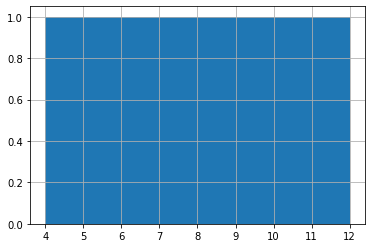

In [ ]:
df.value.hist(bins=9)

<AxesSubplot:xlabel='value', ylabel='v_sqr'>

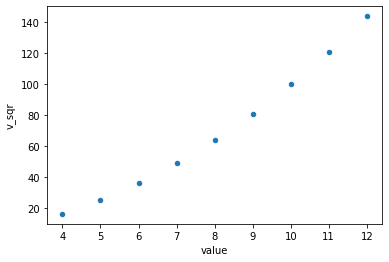

In [51]:
df.plot.scatter(x='value', y='v_sqr')

In [ ]:
# You can also use matplotlib, seaborn, and any library you prefer.